#### Things to DO
- Write functions : Done
- Define LLM : Done
- Bind them : Done
- Define State : Done
- Define SysMsg : Done
- Compile ReAct Graph : Done
- Test with SysMsg : Done
- Implement memory with thread -  MemorySaver() : Done

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph langgraph-prebuilt


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
def add(x: int, y: int) -> int:
    """Returns the sum of two integers.
    Args:
        x (int): The first integer.
        y (int): The second integer."""
    return x + y

def multiply(x: int, y: int) -> int:
    """Returns the product of two integers.
    Args:
        x (int): The first integer.
        y (int): The second integer."""
    return x * y

def divide(x: int, y: int) -> int:
    """Returns the quotient of two integers.
    Args:
        x (int): The first integer.
        y (int): The second integer."""
    return x / y

tools = [add, multiply, divide]

In [3]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model = "gpt-3.5-turbo")
bindedLLM = llm.bind_tools(tools)

In [4]:
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

sysMsg = SystemMessage(content= "You are a helpful math assistant expert in solving arithmetic problems. Solve the problems using the tools provided")


In [11]:
from langgraph.graph import MessagesState

def memAssistant(state: MessagesState):
    return {"messages" : bindedLLM.invoke([sysMsg] + state["messages"])}

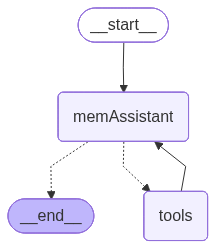

In [19]:
from langgraph.graph import START, END, StateGraph
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import display, Image

builder = StateGraph(MessagesState)

builder.add_node("memAssistant", memAssistant)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "memAssistant")
builder.add_conditional_edges("memAssistant", tools_condition)
builder.add_edge("tools", "memAssistant")
builder.add_edge("memAssistant", END)

ReActGraph = builder.compile()

display(Image(ReActGraph.get_graph().draw_mermaid_png()))

In [24]:
from pprint import pprint
msg = [HumanMessage("Multiply 22 by 11")]
myRes = ReActGraph.invoke({"messages": msg})

for i in myRes["messages"]:
    i.pretty_print()

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


================================ Human Message =================================

Multiply 22 by 11
================================== Ai Message ==================================
Tool Calls:
  multiply (call_zdEThrxaDoQYv9MehRAJn9Gz)
 Call ID: call_zdEThrxaDoQYv9MehRAJn9Gz
  Args:
    x: 22
    y: 11
================================= Tool Message =================================
Name: multiply

242
================================== Ai Message ==================================

The product of 22 multiplied by 11 is 242.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [25]:
msgs = [HumanMessage("Now add 5 to that number")]

myRes = ReActGraph.invoke({"messgaes": msgs})

for i in myRes["messages"]:
    i.pretty_print()

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


================================== Ai Message ==================================
Tool Calls:
  add (call_PM1MjNzcQdIPPFdSa3nig9ec)
 Call ID: call_PM1MjNzcQdIPPFdSa3nig9ec
  Args:
    x: 17
    y: 8
  multiply (call_bdf3nnHk5CB3GuXYR0EUSVkC)
 Call ID: call_bdf3nnHk5CB3GuXYR0EUSVkC
  Args:
    x: 5
    y: 3
  divide (call_Yy95jRVwF9MaVrILCnMmLHs1)
 Call ID: call_Yy95jRVwF9MaVrILCnMmLHs1
  Args:
    x: 50
    y: 10
================================= Tool Message =================================
Name: add

25
================================= Tool Message =================================
Name: multiply

15
================================= Tool Message =================================
Name: divide

5.0
================================== Ai Message ==================================

The results are:

1. The sum of 17 and 8 is 25.
2. The product of 5 and 3 is 15.
3. The quotient of 50 divided by 10 is 5.0.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


### INTRODUCING MEMORY

In [28]:
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

ReActGraphWithMemory = builder.compile(checkpointer= memory)


In [31]:
# Memory needs to configured with Thread

thread = {"configurable": {"thread_id": 786}}

msg = [HumanMessage("Multiply 22 by 11")]
myRes = ReActGraphWithMemory.invoke({"messages": msg}, thread)

for i in myRes["messages"]:
    i.pretty_print()

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


================================ Human Message =================================

Multiply 22 by 11
================================== Ai Message ==================================
Tool Calls:
  multiply (call_h7Sex1SgLnCmBxL4wAdHCRRm)
 Call ID: call_h7Sex1SgLnCmBxL4wAdHCRRm
  Args:
    x: 22
    y: 11
================================= Tool Message =================================
Name: multiply

242
================================== Ai Message ==================================

The product of 22 and 11 is 242.


Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


In [32]:
msg = [HumanMessage("Now add 5 to that result")]
myRes = ReActGraphWithMemory.invoke({"messages": msg}, thread)

for i in myRes["messages"]:
    i.pretty_print()

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')


================================ Human Message =================================

Multiply 22 by 11
================================== Ai Message ==================================
Tool Calls:
  multiply (call_h7Sex1SgLnCmBxL4wAdHCRRm)
 Call ID: call_h7Sex1SgLnCmBxL4wAdHCRRm
  Args:
    x: 22
    y: 11
================================= Tool Message =================================
Name: multiply

242
================================== Ai Message ==================================

The product of 22 and 11 is 242.
================================ Human Message =================================

Now add 5 to that result
================================== Ai Message ==================================
Tool Calls:
  add (call_K9BsAujiV5C1dgp4PEUG30km)
 Call ID: call_K9BsAujiV5C1dgp4PEUG30km
  Args:
    x: 242
    y: 5
================================= Tool Message =================================
Name: add

247
================================== Ai Message ================================

Failed to send compressed multipart ingest: langsmith.utils.LangSmithError: Failed to POST https://eu.api.smith.langchain.com/runs/multipart in LangSmith API. HTTPError('403 Client Error: Forbidden for url: https://eu.api.smith.langchain.com/runs/multipart', '{"error":"Forbidden"}\n')
